# Methods of Evaluating point estimators

CB Sections 7.3.1- 7.3.2, DS Section 7.6

1. Unbiased Estimators
2. Mean squared error
3. Examples
4. Best Unbiased Estimators
5. Cramer-Rao lower bound

## Statistical Inference
- Model: Distribution of the population can be described with a distribution function (pmf or pdf) of a known form but with unknown parameters

    $f(x \mid \theta_1, \ldots, \theta_k)$

    - So if we know the values of the parameters, we know all there is to know about the population
- Inference: Have a sample $X_1,X_2,...,X_n$ from $f(x|\theta)$ and want to
use it to learn about the value of $\theta$
- Point estimator: Any function of $X_1,X_2,...,X_n$
    - Used to estimate $\theta$
    - Some estimators are better than others

## What is a good estimator?
- What is a good estimator of a parameter $\theta$?
- $\theta$ is an unknown number
    - Has some unknown "true" value
- An estimator

    $W = W(X_1, X_2, \ldots, X_n)$

    is a random variable

    - $W$ has a distribution (=sampling distribution)
    - We evaluate $W$ based on the properties of this distribution
- The Properties of a Good Estimator

    When evaluating whether an estimator $W$ is good, we typically look at two key properties:
    - Unbiasedness: $E(W)=\theta \to$ (we are correct on average)
    - Low Variance: $V(W)$ is small $\to$ (The estimator $W$ is accurate (stable))

## **Why is $W$ a Random Variable? (AI)**
Since $X_1, X_2, \dots, X_n$ are drawn from some probability distribution (e.g., normal, binomial, etc.), the estimator $W$ also **inherits randomness** from the sample. This means:
- Every time we collect a new sample $X_1, X_2, \dots, X_n$, we get a different value of $W$.
- If we repeat the sampling process many times, we get a **distribution of $W$**, known as the **sampling distribution** of the estimator.

## Unbiased estimators
### Definition: Bias
Let $W$ be a point estimator of a parameter $\theta$. The *bias* of W is 

$$bias(W)=E(W)-\theta$$

- Book notation: $E_{\theta}(W)$

### Definition: Unbiased estimator
Let $W$ be a point estimator of a parameter $\theta$. Then $W$ is called an *unbiased estimator* if

$$E(W)=\theta\quad i.e.\quad bias(W)=0$$

## Mean squared error
### Definition: Mean squared error
Let W be a point estimator of a parameter $\theta$, The *mean squared error* of $W$ is

$$MSE(W)=E((W-\theta)^2)$$

- Alternative evaluation criteria: mean absolute error

$$MAE(W)=E(|W-\theta|)$$

- MSE can be written as

    $\begin{aligned}
    MSE(W)
    &=E((W-\theta)^2)\\
    &=Var(W-\theta)+E(W-\theta)^2\\
    &=Var(W)+bias(W)^2
    \end{aligned}$

    - If $W$ is an unbiased estimator of $\theta$, then $MSE(W)=Var(W)$.

## Small MSE
- Want small variance and small bias

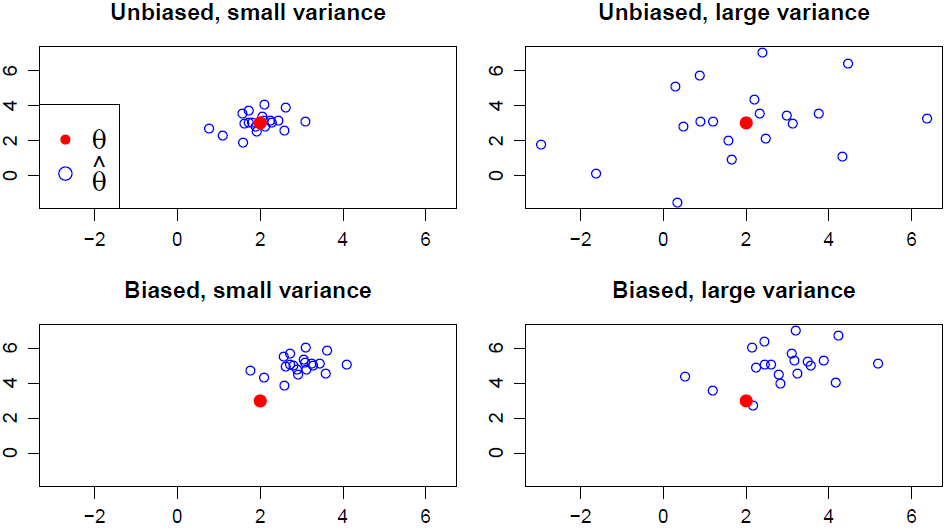

In [1]:
from IPython.display import Image
Image(filename="Images\\MSE.png")

### Example 1: Normal model
- Let $X_1,X_2,...,X_n$ be a random sample from $N(\mu,\sigma^2)$ where $\mu$ and $\sigma^2$ are unknown.
- Find the MSE of $\bar{X}$ and $S^2$ as points estimators of $\mu$ and $\sigma^2$ respectively.

    $\bar{X}$ and $S^2$ are two unbiased estimators.
    - $\bar{X}=\mu$
    - $\frac{(n-1)S^2}{\sigma^2}\sim\chi_{n-1}^2$
    - $E(\bar{X})=\mu$
    - $E(S^2)=\sigma^2$

    If $X\sim\chi_{v}^2$ then, $E(X)=v$ and $Var(X)=2v$.

    $\Rightarrow \text{bias}(\bar{X})=0 \text{ and bias}(S^2)=0$
    - $Var(\bar{X})=\frac{\sigma^2}{n}$
    - $Var(S^2)=Var(\frac{\sigma^2\chi_{n-1}^2}{n-1})=\frac{\sigma^4}{(n-1)^2}Var(\chi_{n-1}^2)=\frac{2\sigma^4}{n-1}$

    According to unbias estimator and MSE,
    - $MSE(\bar{X})=Var(\bar{X})=\frac{\sigma^2}{n}$
    - $MSE(S^2)=Var(S^2)=\frac{2\sigma^4}{n-1}$

    Notice: The MSE depends on the unknown parameters.

### Better estimators?
- Are there other estimators of $\sigma^2$ or $\mu$ that have smaller MSE?
- What about the MLE for $\sigma^2$:

    $\hat{\sigma}^{2} = \frac{1}{n} \sum_{i=1}^{n} (X_{i} - \overline{X})^{2} = \frac{n-1}{n} S^{2}$

    $E(\hat{\sigma}^{2})=\frac{n-1}{n}\sigma^2$

    $bias(\hat{\sigma}^{2})=\frac{n-1}{n}\sigma^2-\sigma^2=-\frac{1}{n}\sigma^2$

    $Var(\hat{\sigma}^{2})=Var(\frac{n-1}{n} S^{2})=\frac{(n-1)^2}{n^2}Var(S^2)=\frac{(n-1)^2}{n^2}\cdot\frac{2\sigma^4}{n-1}=\frac{2(n-1)\sigma^4}{n^2}$

    $MSE(\hat{\sigma}^{2})=\frac{2(n-1)\sigma^4}{n^2}-\frac{1}{n}\sigma^2=\frac{(2n-1)\sigma^4}{n^2}$

    $\frac{2n-1}{n^2}<\frac{2n}{n^2}=\frac{2}{n}<\frac{2}{n-1}\Rightarrow MSE(\hat{\sigma}^{2})<MSE(S^2)$

    $\Rightarrow \hat{\sigma}^{2}$ is a better estimator, w.r.t the MSE.

### Example 2: Binomial model
- Let $Y\sim Binomial(n,p)$ where $p$ is unknown. The Bayes and MLE estimators of $p$ are:

    $\hat{p}^B=\frac{Y+\alpha}{\alpha+\beta+n}$ and $\hat{p}_{MLE}=\frac{Y}{n}$

- Which estimator is better?

    $E(\hat{p}^B)=E(\frac{Y+\alpha}{\alpha+\beta+n})=\frac{np+\alpha}{\alpha+\beta+n}$

    $bias(\hat{p}^B)=E(\hat{p}^B)-p=\frac{np+\alpha}{\alpha+\beta+n}-p$

    $Var(\hat{p}^B)=Var(\frac{np+\alpha}{\alpha+\beta+n})=\frac{np(1-p)}{(\alpha+\beta+n)^2}$

    $MSE(\hat{p}^B)=\frac{np(1-p)}{(\alpha+\beta+n)^2}+(\frac{np+\alpha}{\alpha+\beta+n}-p)^2$

    $E(\hat{p}_{MLE})=E(\frac{Y}{n})=\frac{1}{n}E(Y)=\frac{np}{n}=p$

    $bias(\hat{p}_{MLE})=p-p=0$

    $Var(\hat{p}_{MLE})=Var(\frac{Y}{n})=\frac{p(1-p)}{n}$

    $MSE(\hat{p}_{MLE})=\frac{p(1-p)}{n}$

    Therefore, don't have a clear winner whether $\hat{p}^B$ or $\hat{p}_{MLE}$ has a smaller MSE depends on parameters $\alpha,\beta,n$ and $p$. But we can know the $\hat{p}^B$ has a smaller variance than $\hat{p}_{MLE}$, because $\frac{np(1-p)}{(\alpha+\beta+n)^2}<\frac{p(1-p)}{n}.$
